Step 1: Loading data

In [1]:
#importing packages and loading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

orig_df = pd.read_csv('coffee.csv')
df = pd.read_csv('coffee.csv')
df.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


Step 2: Check Data Quality and Replace Values

In [2]:
#print('original column types: ',orig_df.dtypes)
#print('missing values: ',orig_df.isna().sum())
print('numbers :', orig_df.describe())

df[list(['Region', 'Place name', 'Place type', 'Price'])] = df[list(['Region', 'Place name', 'Place type', 'Price'])].fillna('Unknown')
df['Rating'] = df['Rating'].fillna(0)
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())
df[['Delivery option', 'Dine in option', 'Takeout option']] = df[['Delivery option', 'Dine in option', 'Takeout option']].fillna(False) #Takeout <> Takeaway

numbers :            Rating       Reviews
count  198.000000    198.000000
mean     4.663636    622.494949
std      0.221648   1400.898666
min      3.900000      3.000000
25%      4.600000     47.500000
50%      4.700000    271.500000
75%      4.800000    786.250000
max      5.000000  17937.000000


Step 3: Convert data type properly

In [3]:
df['Reviews'] = df['Reviews'].astype(int)
df[['Delivery option', 'Dine in option', 'Takeout option']] = df[['Delivery option', 'Dine in option', 'Takeout option']].astype(bool)

#print('New column types: ', df.dtypes)

Step 4: Create viz and show distributions for each Place Type

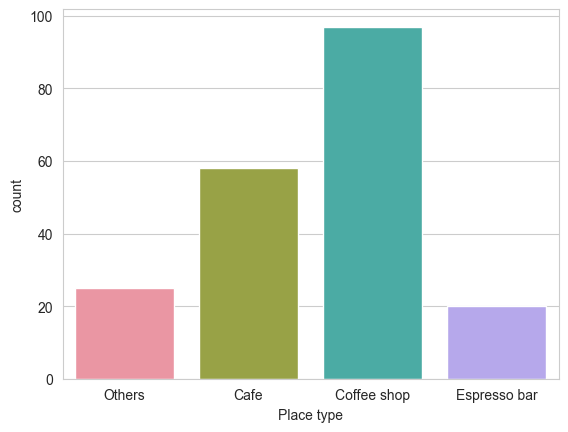

In [4]:
sns.set_style('whitegrid')
sns.set_palette(['#39A7D0','#36ADA4'])
sns.countplot(x = 'Place type', data = df)
plt.show()

Step 5: Create viz and show distributions for reviews.

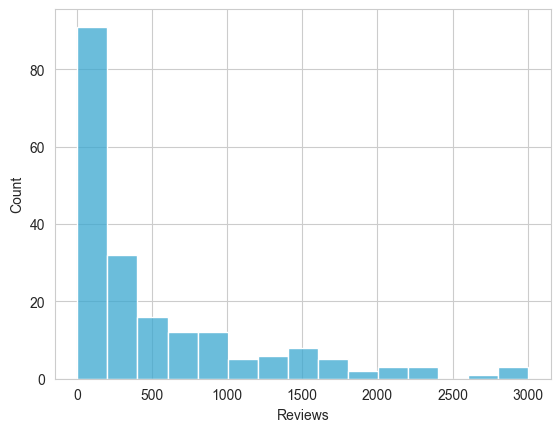

In [5]:
sns.histplot(data = df[df['Reviews'] < 15000], x = 'Reviews', binwidth = 200) #excluding the outlier = 17.500
plt.show()

Step 6: Create a boxplot to show the relationship between type of store and number of reviews.

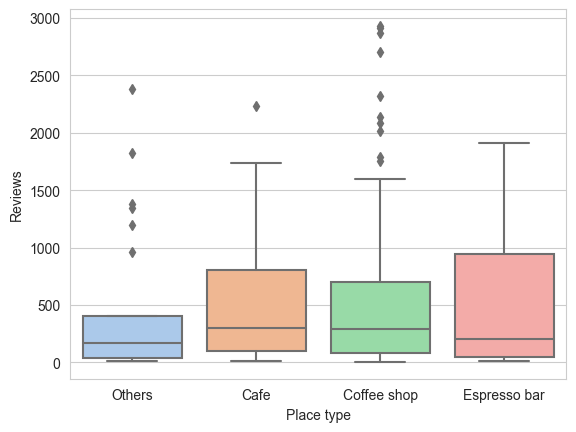

In [6]:
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.boxplot(data = df[df['Reviews'] < 15000], x = 'Place type', y = 'Reviews')
plt.show()